In [7]:
import pandas as pd 

df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Fazendo uma rápida descrição dos dados, em especial o número total de linhas, o tipo de cada atributo e o número de valores não nulos usando o método **info()**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


Existem 545 instâncias no conjunto de dados e 1 valor nulo

Observando um resumo dos atributos numéricos do dataframe

In [9]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


Traçando um histograma para cada atributo númerico

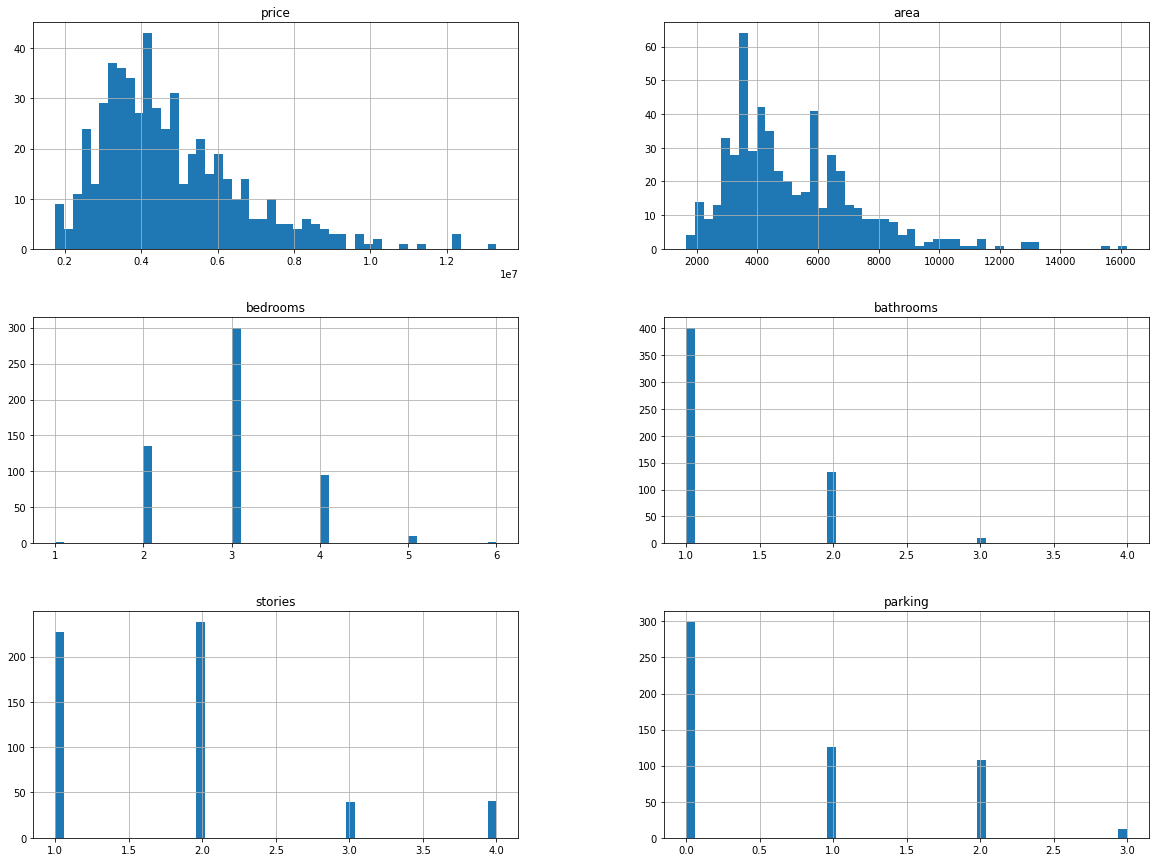

In [10]:
%matplotlib inline 

import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

Criando um Conjunto de Testes

In [11]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data)) #Retorna uma array com uma sequencia permutada do tamanho do número
    test_set_size = int(len(data) * test_ratio) #Tamanho do conjunto de teste
    test_indices = shuffled_indices[:test_set_size] # Separando os indices do conjunto de teste
    train_indices = shuffled_indices[test_set_size:] # Separando os indices para o conjunto de treino
    return data.iloc[train_indices], data.iloc[test_indices]

Devido a função np.random.permutation, ao executar o programa novamente, será gerado um conjunto diferente de testes. Assim, a máquina poderá depois de um tempo ver todo o conjunto de dados

In [12]:
train_set, test_set = split_train_test(df, 0.2)

In [15]:
print(len(train_set), "train +", len(test_set), "test")

436 train + 109 test


Uma solução comum ao problema é utilizar o identificador de cada instância para decidir se ela deve ou não ir para o conjunto de teste. Assim, garantindo que o conjunto de teste permanecerá consistente  em várias execuções, mesmo ao atualizar os dados

In [16]:
import hashlib

def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio #Returns the hash value of an object. Hash value are integers that are used to compare dictionary keys
def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [17]:
df_with_id = df.reset_index() # adiciona uma coluna ‘index`
train_set, test_set = split_train_test_by_id(df_with_id, 0.2, "index")

O Scikit-Learn fornece algumas funções para dividir conjuntos de dados em vários subconjuntos de diversas maneiras.